In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
f_birth = pd.read_csv('daily-total-female-births-CA.csv', index_col=[0], parse_dates= [0])

In [6]:
f_birth.head()

,"Daily total female births in California, 1959"
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [7]:
type(f_birth)

pandas.core.frame.DataFrame

In [8]:
series_value = f_birth.values

In [9]:
type(series_value)

numpy.ndarray

In [10]:
f_birth.size

365

In [11]:
f_birth.tail()

,"Daily total female births in California, 1959"
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [12]:
f_birth.describe()

,"Daily total female births in California, 1959"
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


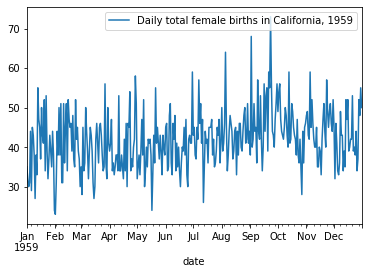

In [13]:
f_birth.plot()

In [14]:
f_birth_mean = f_birth.rolling(window=20).mean()

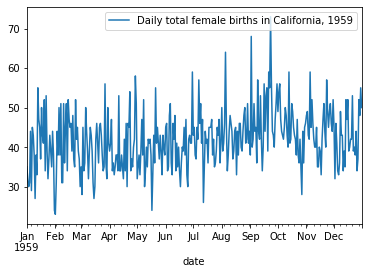

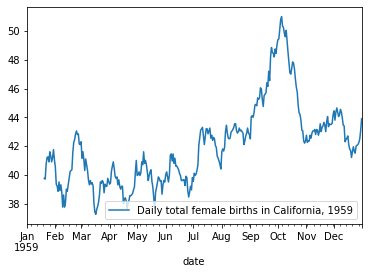

In [15]:
f_birth.plot()
f_birth_mean.plot()

In [16]:
value = pd.DataFrame(series_value)

In [17]:
birth_df = pd.concat([value, value.shift(1)], axis=1)

In [18]:
birth_df.head()

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [19]:
birth_df.columns = ['Actual_birth', 'Forecast_birth'] 

In [20]:
birth_df.head()

,Actual_birth,Forecast_birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [22]:
birth_test = birth_df[1:]

In [23]:
birth_test.head()

,Actual_birth,Forecast_birth
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0


In [24]:
birth_error = mean_squared_error(birth_test.Actual_birth, birth_test.Forecast_birth)

In [25]:
birth_error

84.22252747252747

In [26]:
np.sqrt(birth_error)

9.177283229394606

In [27]:
ARIMA - Autoregressive (p) Integrated (d) Moving Average(q)

SyntaxError: invalid syntax (<ipython-input-27-eb0331ed87dd>, line 1)

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

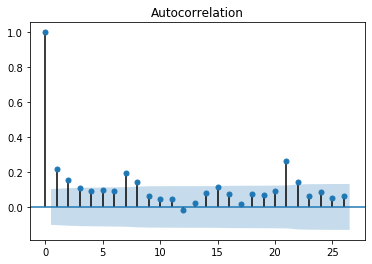

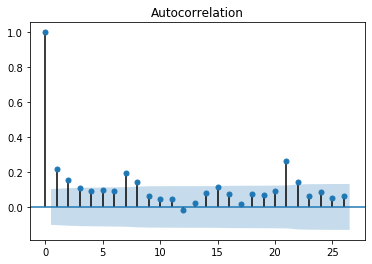

In [29]:
# plot_acf is to identify parameter Q
# ARIMA(p,d,q)
plot_acf(f_birth)

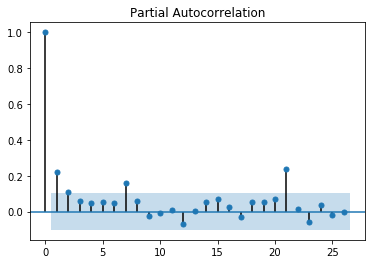

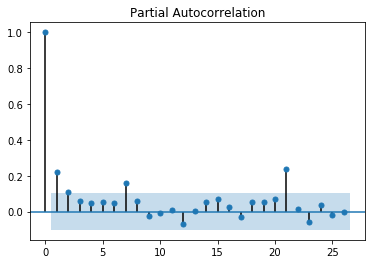

In [30]:
 plot_pacf(f_birth) #to identify the value of p

In [31]:
# p = 2 or 3  d=0, & q = 3,4
f_birth.size

365

In [32]:
birth_train = f_birth[0:330]
birth_test = f_birth[330:365]

In [33]:
birth_train.size

330

In [35]:
birth_test.size

35

In [36]:
from statsmodels.tsa.arima_model import ARIMA

In [107]:
birth_model = ARIMA(birth_train, order=(3,1,3))

D:\Desktop\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Desktop\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [108]:
birth_model_fit = birth_model.fit()

D:\Desktop\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [109]:
birth_model_fit.aic

2225.7894266092785

In [110]:
birth_forecast = birth_model_fit.forecast(steps=35)[0]

In [111]:
birth_forecast

array([44.60192356, 44.32104256, 44.86715241, 45.59064871, 45.94150808,
       45.6705383 , 45.00059025, 44.4544388 , 44.45828291, 45.02059309,
       45.72821881, 46.0607895 , 45.78416977, 45.12548727, 44.59891772,
       44.61582887, 45.17486634, 45.86544795, 46.18015173, 45.89833444,
       45.25097135, 44.74359454, 44.77303655, 45.3285237 , 46.00225018,
       46.29959715, 46.01302656, 45.37702631, 44.88845448, 44.92990367,
       45.48157705, 46.13864246, 46.419135  , 46.12824069, 45.50363625])

In [112]:
birth_test

,"Daily total female births in California, 1959"
date,
1959-11-27,51
1959-11-28,46
1959-11-29,44
1959-11-30,52
1959-12-01,45
1959-12-02,32
1959-12-03,46
1959-12-04,41
1959-12-05,34


In [113]:
np.sqrt(mean_squared_error(birth_test, birth_forecast))

6.718389850201937

In [ ]:
Project 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
f_birth = pd.read_csv('daily-total-female-births-CA.csv', index_col=[0], parse_dates= [0])

In [3]:
f_birth.head()

,"Daily total female births in California, 1959"
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [4]:
f_birth.tail()

,"Daily total female births in California, 1959"
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [5]:
f_birth.size

365

In [6]:
# Normalization

# 1. If data is on different scales
# 2. Because some Algorithms worked better when data is normalized
# 3. Beacuse You are a data scientist and you have to keep on exploring with data transformation techniques

In [ ]:
# normalization =  (X - min) / (max - min)

In [7]:
f_birth.min()

Daily total female births in California, 1959    23
dtype: int64

In [9]:
f_birth.max()

Daily total female births in California, 1959    73
dtype: int64

In [10]:
(37 - 23) / (73 - 23)

0.28

In [11]:
(55 -23) / (73 - 23)

0.64

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
birth_arr = f_birth.values

In [16]:
birth_arr

array([[35],
       [32],
       [30],
       [31],
       [44],
       [29],
       [45],
       [43],
       [38],
       [27],
       [38],
       [33],
       [55],
       [47],
       [45],
       [37],
       [50],
       [43],
       [41],
       [52],
       [34],
       [53],
       [39],
       [32],
       [37],
       [43],
       [39],
       [35],
       [44],
       [38],
       [24],
       [23],
       [31],
       [44],
       [38],
       [50],
       [38],
       [51],
       [31],
       [31],
       [51],
       [36],
       [45],
       [51],
       [34],
       [52],
       [47],
       [45],
       [46],
       [39],
       [48],
       [37],
       [35],
       [52],
       [42],
       [45],
       [39],
       [37],
       [30],
       [35],
       [28],
       [45],
       [34],
       [36],
       [50],
       [44],
       [39],
       [32],
       [39],
       [45],
       [43],
       [39],
       [31],
       [27],
       [30],
       [42],
       [46],

In [19]:
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
scale  = scaler.fit(birth_arr)

In [25]:
scaler.data_min_

array([23.])

In [26]:
birth_normalize = scaler.transform(birth_arr)

In [27]:
birth_normalize[0]

array([0.24])

In [28]:
for i in range(5):
    print(birth_normalize[i])

[0.24]
[0.18]
[0.14]
[0.16]
[0.42]


In [29]:
birth_train = birth_normalize[0:330]
birth_test = birth_normalize[330:365]

In [30]:
birth_train.size

330

In [31]:
birth_test.size

35

In [32]:
from statsmodels.tsa.arima_model import ARIMA

In [33]:
birth_model = ARIMA(birth_train, order=(2,1,2))

In [34]:
birth_model_fit = birth_model.fit()

D:\Desktop\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\Desktop\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


In [35]:
birth_model_fit.aic

-344.266918149831

In [36]:
birth_forecast = birth_model_fit.forecast(steps=35)[0]

In [37]:
birth_forecast

array([0.46607699, 0.46223046, 0.46161373, 0.46132041, 0.46115282,
       0.4610829 , 0.46109539, 0.46117789, 0.46131987, 0.4615124 ,
       0.46174787, 0.46201983, 0.46232281, 0.46265214, 0.46300386,
       0.46337461, 0.46376152, 0.46416217, 0.46457449, 0.46499674,
       0.46542741, 0.46586525, 0.46630917, 0.46675826, 0.46721175,
       0.46766898, 0.46812937, 0.46859246, 0.46905784, 0.46952517,
       0.46999416, 0.47046455, 0.47093613, 0.47140873, 0.47188219])

In [38]:
birth_test

array([[0.56],
       [0.46],
       [0.42],
       [0.58],
       [0.44],
       [0.18],
       [0.46],
       [0.36],
       [0.22],
       [0.2 ],
       [0.26],
       [0.52],
       [0.4 ],
       [0.4 ],
       [0.22],
       [0.32],
       [0.24],
       [0.58],
       [0.48],
       [0.58],
       [0.32],
       [0.34],
       [0.38],
       [0.38],
       [0.6 ],
       [0.32],
       [0.34],
       [0.3 ],
       [0.42],
       [0.22],
       [0.28],
       [0.58],
       [0.5 ],
       [0.64],
       [0.54]])

In [40]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [42]:
np.sqrt(mean_squared_error(birth_test, birth_forecast))

0.1446485362458255

In [45]:
birth_forecast_reshape = birth_forecast.reshape(len(birth_forecast), 1)


In [48]:
birth_forecast_reverse = scaler.inverse_transform(birth_forecast_reshape)

In [49]:
birth_forecast_reverse

array([[46.3038496 ],
       [46.11152292],
       [46.08068674],
       [46.06602051],
       [46.05764105],
       [46.05414475],
       [46.05476959],
       [46.05889456],
       [46.06599359],
       [46.07561978],
       [46.08739338],
       [46.10099172],
       [46.11614059],
       [46.13260699],
       [46.15019296],
       [46.16873025],
       [46.18807592],
       [46.20810849],
       [46.22872475],
       [46.24983698],
       [46.27137066],
       [46.29326246],
       [46.31545857],
       [46.33791325],
       [46.36058766],
       [46.38344877],
       [46.40646853],
       [46.4296231 ],
       [46.45289223],
       [46.4762587 ],
       [46.49970788],
       [46.52322734],
       [46.54680652],
       [46.57043646],
       [46.59410951]])

In [50]:
birth_test_reshape = birth_test.reshape(len(birth_test), 1)

In [51]:
birth_test_reverse = scaler.inverse_transform(birth_test_reshape)

In [52]:
birth_test_reverse

array([[51.],
       [46.],
       [44.],
       [52.],
       [45.],
       [32.],
       [46.],
       [41.],
       [34.],
       [33.],
       [36.],
       [49.],
       [43.],
       [43.],
       [34.],
       [39.],
       [35.],
       [52.],
       [47.],
       [52.],
       [39.],
       [40.],
       [42.],
       [42.],
       [53.],
       [39.],
       [40.],
       [38.],
       [44.],
       [34.],
       [37.],
       [52.],
       [48.],
       [55.],
       [50.]])

In [53]:
np.sqrt(mean_squared_error(birth_test_reverse, birth_forecast_reverse))

7.232426812291274

In [54]:
# Standardization
# X - mean / Standard deviation
from sklearn.preprocessing import StandardScaler

In [55]:
std_scaler = StandardScaler()
std_scaler = std_scaler.fit(birth_arr)

In [57]:
std_scaler.mean_

array([41.98082192])

In [58]:
std_scaler.var_

array([53.84894727])

In [59]:
std_birth = std_scaler.transform(birth_arr)

In [60]:
std_birth[0]

array([-0.95130099])

In [61]:
std_birth[5]

array([-1.76894196])

In [62]:
std_birth_train = std_birth[0:330]
std_birth_test = std_birth[330:365]

In [64]:
std_birth_arima = ARIMA(std_birth_train, order = (2,1,2))

In [65]:
std_birth_arima_fit = std_birth_arima.fit()

In [66]:
std_birth_arima_fit.aic

918.3905958001019

In [67]:
std_birth_forecast = std_birth_arima_fit.forecast(steps = 35)[0]

In [68]:
std_birth_forecast

array([0.59018356, 0.56405396, 0.5596535 , 0.55747076, 0.55618318,
       0.5555942 , 0.55559344, 0.5560908 , 0.55701015, 0.55828701,
       0.55986674, 0.56170307, 0.56375678, 0.56599466, 0.56838856,
       0.57091465, 0.57355273, 0.57628568, 0.579099  , 0.58198042,
       0.58491953, 0.58790751, 0.5909369 , 0.59400136, 0.59709555,
       0.60021491, 0.6033556 , 0.60651436, 0.60968843, 0.61287547,
       0.6160735 , 0.61928084, 0.62249606, 0.62571797, 0.62894553])

In [69]:
std_birth_test

array([[ 1.22907491],
       [ 0.54770744],
       [ 0.27516045],
       [ 1.3653484 ],
       [ 0.41143395],
       [-1.36012148],
       [ 0.54770744],
       [-0.13366003],
       [-1.08757449],
       [-1.22384798],
       [-0.8150275 ],
       [ 0.95652792],
       [ 0.13888696],
       [ 0.13888696],
       [-1.08757449],
       [-0.40620702],
       [-0.95130099],
       [ 1.3653484 ],
       [ 0.68398093],
       [ 1.3653484 ],
       [-0.40620702],
       [-0.26993352],
       [ 0.00261346],
       [ 0.00261346],
       [ 1.5016219 ],
       [-0.40620702],
       [-0.26993352],
       [-0.54248051],
       [ 0.27516045],
       [-1.08757449],
       [-0.67875401],
       [ 1.3653484 ],
       [ 0.82025443],
       [ 1.77416889],
       [ 1.09280142]])

In [70]:
birth_forecast_reshape = std_birth_forecast.reshape(len(std_birth_forecast), 1)

In [71]:
std_birth_forecast_rev = std_scaler.inverse_transform(birth_forecast_reshape)

In [72]:
std_birth_forecast_rev

array([[46.31169761],
       [46.11995376],
       [46.08766239],
       [46.07164506],
       [46.06219654],
       [46.0578745 ],
       [46.05786894],
       [46.06151866],
       [46.06826502],
       [46.07763482],
       [46.08922718],
       [46.10270248],
       [46.11777299],
       [46.13419497],
       [46.15176189],
       [46.1702988 ],
       [46.18965748],
       [46.20971236],
       [46.23035705],
       [46.25150143],
       [46.27306915],
       [46.29499551],
       [46.31722571],
       [46.33971332],
       [46.36241901],
       [46.38530946],
       [46.40835643],
       [46.431536  ],
       [46.45482791],
       [46.47821501],
       [46.50168273],
       [46.52521877],
       [46.54881267],
       [46.57245561],
       [46.59614009]])

In [73]:
birth_test_reshape = std_birth_test.reshape(len(std_birth_test),1)
birth_test_rev = std_scaler.inverse_transform(birth_test_reshape)

In [74]:
birth_test_rev

array([[51.],
       [46.],
       [44.],
       [52.],
       [45.],
       [32.],
       [46.],
       [41.],
       [34.],
       [33.],
       [36.],
       [49.],
       [43.],
       [43.],
       [34.],
       [39.],
       [35.],
       [52.],
       [47.],
       [52.],
       [39.],
       [40.],
       [42.],
       [42.],
       [53.],
       [39.],
       [40.],
       [38.],
       [44.],
       [34.],
       [37.],
       [52.],
       [48.],
       [55.],
       [50.]])

In [75]:
np.sqrt(mean_squared_error(birth_test_rev, birth_forecast_reverse))

7.232426812291274